In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.random.uniform(0, 1, 20)
N = np.random.randn(20)
Y = np.sin(2*np.pi*X)+N
train_x, test_x = X[:10], X[10:]
train_y, test_y = Y[:10], Y[10:]
train_x = np.sort(train_x)
test_x = np.sort(test_x)

In [ ]:
degree = [0, 1, 3, 9]
weights = []
train_fit = []
test_fit = []
train_error = []
test_error = []
for i in degree:
  poly = pf(degree=i)
  poly_tr_x = poly.fit_transform(train_x.reshape(-1, 1))
  poly_ts_x = poly.fit_transform(test_x.reshape(-1, 1))
  pr = lm.LinearRegression()
  pr.fit(poly_tr_x, train_y)
  pred_tr = pr.predict(poly_tr_x)
  pred_ts = pr.predict(poly_ts_x)
  train_error.append((mean_squared_error(train_y, pred_tr))**0.5)
  test_error.append((mean_squared_error(test_y, pred_ts))**0.5)
  train_fit.append(list(pred_tr))
  test_fit.append(list(pred_ts))
  weights.append(pr.coef_)

In [ ]:
weights_new = pd.DataFrame(columns=['name']+['M='+str(i) for i in degree])
for i in range(degree[-1]+1):
  c_dict = {'name':'w'+str(i)}
  for j in range(len(degree)):
    if i < len(weights[j]):
      c_dict['M='+str(degree[j])] = round(weights[j][i], 3)
    else:
      c_dict['M='+str(degree[j])] = 0
  weights_new = weights_new.append(c_dict, ignore_index=True)
print(weights_new)

  name  M=0    M=1     M=3           M=9
0   w0  0.0  0.000   0.000  0.000000e+00
1   w1  0.0 -2.268  22.826 -1.117633e+05
2   w2  0.0  0.000 -57.700  1.100885e+06
3   w3  0.0  0.000  35.968 -5.617888e+06
4   w4  0.0  0.000   0.000  1.704529e+07
5   w5  0.0  0.000   0.000 -3.252101e+07
6   w6  0.0  0.000   0.000  3.945822e+07
7   w7  0.0  0.000   0.000 -2.957286e+07
8   w8  0.0  0.000   0.000  1.248789e+07
9   w9  0.0  0.000   0.000 -2.272770e+06


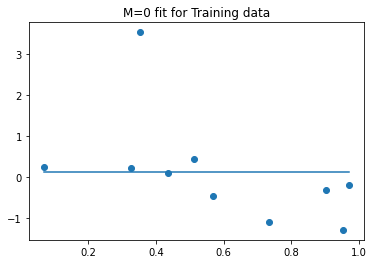

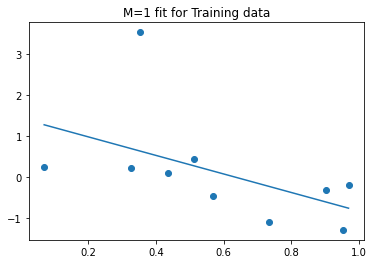

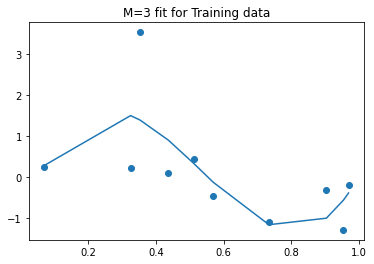

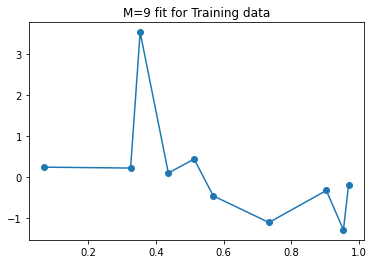

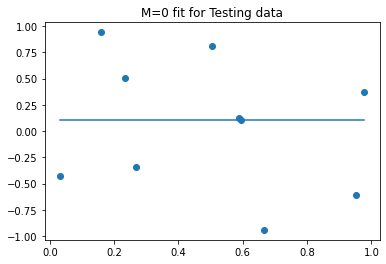

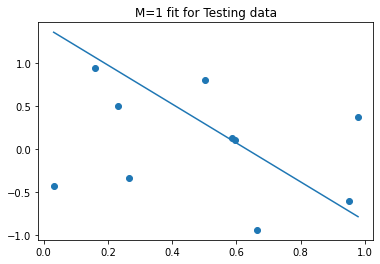

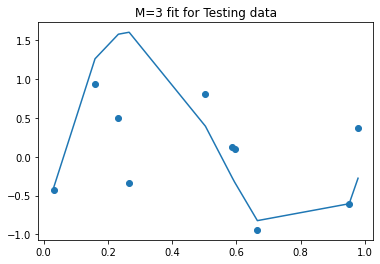

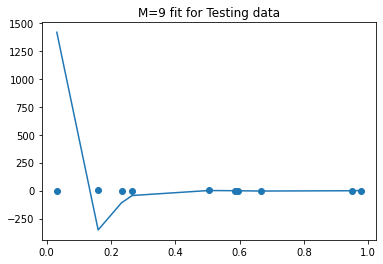

In [ ]:
for i in range(len(train_fit)):
  plt.clf()
  plt.scatter(train_x, train_y)
  plt.plot(train_x, train_fit[i])
  plt.title('M='+str(degree[i])+' fit for Training data')
  plt.show()
for i in range(len(test_fit)):
  plt.clf()
  plt.scatter(test_x, test_y)
  plt.plot(test_x, test_fit[i])
  plt.title('M='+str(degree[i])+' fit for Testing data')
  plt.show()

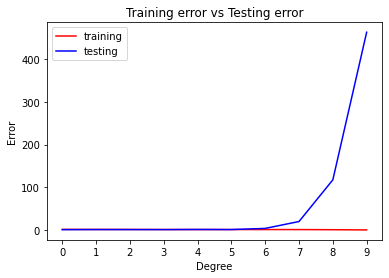

In [ ]:
degree = [i for i in range(10)]
train_error = []
test_error = []
for i in degree:
  poly = pf(degree=i)
  poly_tr_x = poly.fit_transform(train_x.reshape(-1, 1))
  poly_ts_x = poly.fit_transform(test_x.reshape(-1, 1))
  pr = lm.LinearRegression()
  pr.fit(poly_tr_x, train_y)
  pred_tr = pr.predict(poly_tr_x)
  pred_ts = pr.predict(poly_ts_x)
  train_error.append((mean_squared_error(train_y, pred_tr))**0.5)
  test_error.append((mean_squared_error(test_y, pred_ts))**0.5)
plt.plot([i for i in range(len(train_error))], train_error, color='red', label='training')
plt.plot([i for i in range(len(test_error))], test_error, color='blue', label='testing')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.xticks(degree)
plt.title('Training error vs Testing error')
plt.legend(loc='upper left')
plt.show()

In [ ]:
X = np.random.uniform(0, 1, 100)
N = np.random.randn(100)
Y = np.sin(2*np.pi*X)+N
train_x, test_x = X[:90], X[10:]
train_y, test_y = Y[:90], Y[10:]
train_x = np.sort(train_x)
test_x = np.sort(test_x)

In [ ]:
poly = pf(degree=9)
poly_tr_x = poly.fit_transform(train_x.reshape(-1, 1))
poly_ts_x = poly.fit_transform(test_x.reshape(-1, 1))
pr = lm.LinearRegression()
pr.fit(poly_tr_x, train_y)
pred_tr = pr.predict(poly_tr_x)
pred_ts = pr.predict(poly_ts_x)

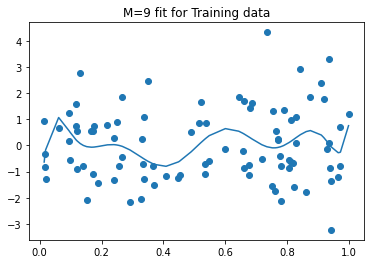

In [ ]:
plt.clf()
plt.scatter(train_x, train_y)
plt.plot(train_x, list(pred_tr))
plt.title('M='+str(9)+' fit for Training data')
plt.show()

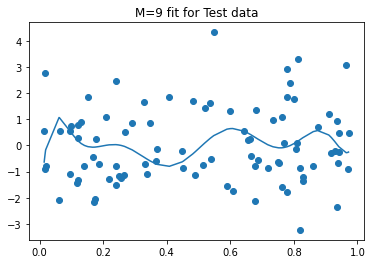

In [ ]:
plt.clf()
plt.scatter(test_x, test_y)
plt.plot(test_x, list(pred_ts))
plt.title('M='+str(9)+' fit for Test data')
plt.show()

In [ ]:
def regularization(coefs, y, )

array([-0.65284777,  0.78394013,  2.73696468,  0.17595271,  0.62712775,
       -0.8940737 , -0.69161918,  0.6609366 , -1.01122872, -0.59042615,
       -0.40460751,  1.8035905 ,  1.06446145, -1.33229588,  0.61138298,
       -0.7214828 , -0.89276837, -0.63692681, -0.08813512,  0.50437971])